# VISUALIZATIONS TO CHECK OFF 

K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['feature1', 'feature2']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['feature1', 'feature2']])
sns.scatterplot(x='feature1', y='feature2', hue='cluster', data=df)

A. Univariate Visualizations (For single-variable analysis)

    Histograms: Show the distribution of a numeric variable.
        Example: sns.histplot(df['feature'], bins=30, kde=True)
    Box Plots: Identify the distribution and outliers of a variable.
        Example: sns.boxplot(x=df['feature'])
    KDE Plot: Show the probability density of a continuous variable.
        Example: sns.kdeplot(df['feature'])
    Bar Charts: Useful for categorical data to show frequency counts.
        Example: df['category_feature'].value_counts().plot(kind='bar')

B. Bivariate & Multivariate Visualizations (For examining relationships)

    Scatter Plots: Show the relationship between two continuous variables.
        Example: sns.scatterplot(x='feature1', y='feature2', data=df)
    Pair Plot: Matrix of scatter plots for examining relationships between multiple variables.
        Example: sns.pairplot(df, hue='target')
    Correlation Heatmap: Visualize the correlation between numerical features.
        Example: sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    Box Plot by Group: Show the distribution of a variable grouped by a categorical variable.
        Example: sns.boxplot(x='category_feature', y='numeric_feature', data=df)

C. Time Series Visualizations (For time-dependent data)

    Line Plot: Common for time series data to track changes over time.
        Example: sns.lineplot(x='date', y='value', data=df)
    Seasonal Decomposition: Decompose time series data into trend, seasonality, and residuals.
        Example: from statsmodels.tsa.seasonal import seasonal_decompose; seasonal_decompose(df['value'], model='additive').plot()

D. Distribution and Anomaly Detection

    Violin Plot: Combines box plot and KDE plot, useful for visualizing distributions.
        Example: sns.violinplot(x='category_feature', y='numeric_feature', data=df)
    Z-score / IQR for Outlier Detection: Identify and visualize outliers in numerical data.
    Missing Value Heatmap: Visualize missing data across features.
        Example: sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

    Purpose: Finds clusters based on the density of data points, useful for irregularly shaped clusters.
    Example:

    python

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(df[['feature1', 'feature2']])
sns.scatterplot(x='feature1', y='feature2', hue='cluster', data=df)

Hierarchical Clustering

    Purpose: Builds a hierarchy of clusters that can be visualized using a dendrogram.
    Example:

    python

from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df[['feature1', 'feature2']], method='ward')
dendrogram(linkage_matrix)

D. t-SNE and PCA for Dimensionality Reduction (Often used in conjunction with clustering)

    Purpose: Reduce high-dimensional data to 2D for visualization and clustering.
    Example (t-SNE):

    python

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df['tsne-2d-one'], df['tsne-2d-two'] = tsne.fit_transform(df[['feature1', 'feature2', 'feature3']])
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='cluster', data=df)

# Data Exploration

---

## 1. Introduction

- Briefly describe the purpose of this notebook.
- Outline the main questions guiding your exploratory analysis.

## 2. Data Loading and Overview

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sys
import os

# Assuming 'scripts' is in the same parent directory as 'notebooks'
sys.path.append(os.path.abspath("../scripts"))
logistics_df = pd.read_csv('../data/raw/logistics_df.csv')

In [2]:
from utils import plot_numeric_correlation_heatmap, load_cleaned_data, save_data, save_model, plot_distribution, plot_correlation_heatmap, check_missing_values, ensure_dir
from modeling import train_model, evaluate_model
from sklearn.model_selection import train_test_split

In [3]:
# Display basic info and initial rows
logistics_df.info()
logistics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Route ID                       10000 non-null  object 
 1   Driver ID                      10000 non-null  object 
 2   Delivery Time (hours)          10000 non-null  float64
 3   Date                           10000 non-null  object 
 4   Fuel Costs (USD)               10000 non-null  float64
 5   Delivery Start Time            10000 non-null  object 
 6   Distance Traveled (miles)      10000 non-null  float64
 7   Estimated Distance (miles)     10000 non-null  float64
 8   Weather Conditions             10000 non-null  object 
 9   Traffic Conditions             10000 non-null  object 
 10  Driver Ratings                 10000 non-null  float64
 11  Customer Satisfaction          10000 non-null  object 
 12  Delays (hours)                 10000 non-null  

,Route ID,Driver ID,Delivery Time (hours),Date,Fuel Costs (USD),Delivery Start Time,Distance Traveled (miles),Estimated Distance (miles),Weather Conditions,Traffic Conditions,...,Cost per Gallon (USD),Total Fuel Cost (USD),Insurance Costs (USD),Breakdown Repair Costs (USD),Overtime Labor Costs (USD),Fuel Surcharge (USD),Idle Cost (USD),Total Operational Cost (USD),Fuel Cost per Mile,Delivery Efficiency Score
0,c405a09a-7c1c-4cbb-b044-8d93ec12fd41,cd5f2588-0177-4ecf-b43b-64e4cffdae77,3.661775,2023-04-24,73.167465,18:11:58,1453.290310,1284.660045,Snow,Moderate,...,3.5,612.042183,82.188272,658.105936,0.000000,7.739251,1.197690,854.695690,0.050346,0.035347
1,1fedfb9c-4dd4-4866-ba9b-249b6c28a57c,cef901ab-9579-4d33-8a47-f2d772f71c72,9.159558,2023-08-08,639.179375,00:56:12,751.259132,2132.837081,Snow,Moderate,...,3.0,271.188926,31.393083,699.534174,29.666102,67.608867,0.909051,1531.803244,0.850811,0.006516
2,5870f02e-e6c5-47a2-b17c-2d9eb0a6b371,0ee00c87-6ef8-4895-b25a-ef185b8f1555,1.372942,2023-08-22,92.633480,02:29:03,2666.204691,2661.824609,Light Rain,Light,...,3.5,1122.851867,54.905655,999.656631,0.000000,9.798258,2.693096,1178.100685,0.034744,0.060085
3,7d4a8625-bd3a-42e8-ba14-1770b143f82d,49a5eacb-02d2-408b-b79d-9d3f447d2e37,3.855411,2023-08-24,538.893607,21:07:08,1220.239053,691.805233,Snow,Severe,...,3.0,440.480927,39.639937,825.812869,0.000000,57.001192,2.442666,1495.349013,0.441630,0.047148
4,a4f49219-8ed9-49cd-a20e-6f82cc0e9554,b3ae425a-f6f9-41c6-ac70-672e7a7e5bcf,2.194644,2023-08-10,810.358195,11:36:06,2686.870337,2337.833994,Heavy Rain,Heavy,...,3.5,1131.555047,39.600330,769.116645,0.000000,85.715218,2.511495,1727.060317,0.301599,0.017343


In [4]:
# Display summary statistics for numerical features
logistics_df.describe()

,Delivery Time (hours),Fuel Costs (USD),Distance Traveled (miles),Estimated Distance (miles),Driver Ratings,Delays (hours),Warehouse Storage Costs (USD),Truck Maintenance Costs (USD),Load Weight (tons),Truck Condition,...,Cost per Gallon (USD),Total Fuel Cost (USD),Insurance Costs (USD),Breakdown Repair Costs (USD),Overtime Labor Costs (USD),Fuel Surcharge (USD),Idle Cost (USD),Total Operational Cost (USD),Fuel Cost per Mile,Delivery Efficiency Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.502595,523.056630,1512.281363,1519.725331,3.003039,2.507066,299.962780,1251.653909,10.291621,2.987700,...,3.249300,591.216261,60.262125,245.111574,5.548700,55.326044,1.634738,930.955117,0.722688,0.033586
std,2.581588,274.882730,842.848148,857.408001,1.160931,1.443928,115.481197,432.129941,5.596234,1.413417,...,0.250012,333.839795,23.087846,330.909716,12.608457,29.075578,0.954494,451.723221,1.358020,0.040816
min,1.002174,50.119227,50.168665,50.423073,1.000032,0.000092,100.035815,500.118466,0.504212,1.000000,...,3.000000,18.109845,20.005822,0.000000,0.000000,5.301335,0.000981,107.935917,0.017662,0.000594
25%,3.263069,284.777231,784.426876,782.289688,2.005326,1.255751,199.887141,875.585363,5.522078,2.000000,...,3.000000,304.753278,40.463084,0.000000,0.000000,30.122164,0.810235,578.458417,0.189864,0.011653
50%,5.501135,527.045504,1501.636961,1504.079980,3.005121,2.502614,300.762335,1259.546060,10.318748,3.000000,...,3.000000,584.535578,60.360515,0.000000,0.000000,55.747965,1.637016,908.789852,0.345992,0.020288
75%,7.712381,760.789227,2227.921817,2257.622287,4.012544,3.751494,398.814828,1620.842677,15.119794,4.000000,...,3.500000,866.759236,80.210438,516.168623,0.000000,80.472086,2.442875,1198.090551,0.659087,0.038600
max,9.999681,999.802006,2999.865621,2999.973884,4.999957,4.999893,499.970446,1999.890065,19.996658,5.000000,...,3.500000,1263.370635,99.955162,999.960106,51.159770,105.753539,3.499954,2225.352671,18.373516,0.564925


In [5]:
# Check for missing values
missing_values = logistics_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

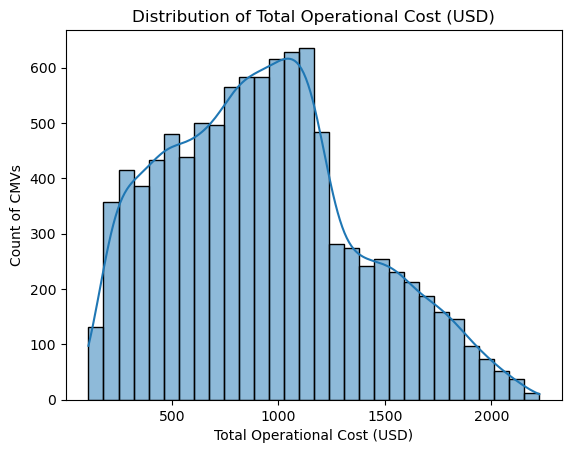

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Total Operational Cost
sns.histplot(logistics_df['Total Operational Cost (USD)'], bins=30, kde=True)
plt.title("Distribution of Total Operational Cost (USD)")
plt.ylabel("Count of CMVs")
plt.show()

In [7]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Copy DataFrame to work with encoding
encoded_df = logistics_df.copy()

# Drop columns that don't contribute to correlation analysis
encoded_df = logistics_df.drop(columns=['Route ID', 'Driver ID', 'Date', 'Delivery Start Time'], errors='ignore')

# Ordinal Encoding for ordered categories
ordinal_encoder = OrdinalEncoder(categories=[['Junior', 'Intermediate', 'Senior']])
encoded_df['Driver Experience'] = ordinal_encoder.fit_transform(encoded_df[['Driver Experience']])

# One-Hot Encoding for nominal categories
encoded_df = pd.get_dummies(encoded_df, columns=['Traffic Conditions', 'Weather Conditions', 
                                                 'Route Type', 'Truck Type', 'Load Type', 
                                                 'Delivery Window', 'Customer Satisfaction',
                                                 'Fuel Type'], 
                            drop_first=True)  # Drop first level to avoid multicollinearity


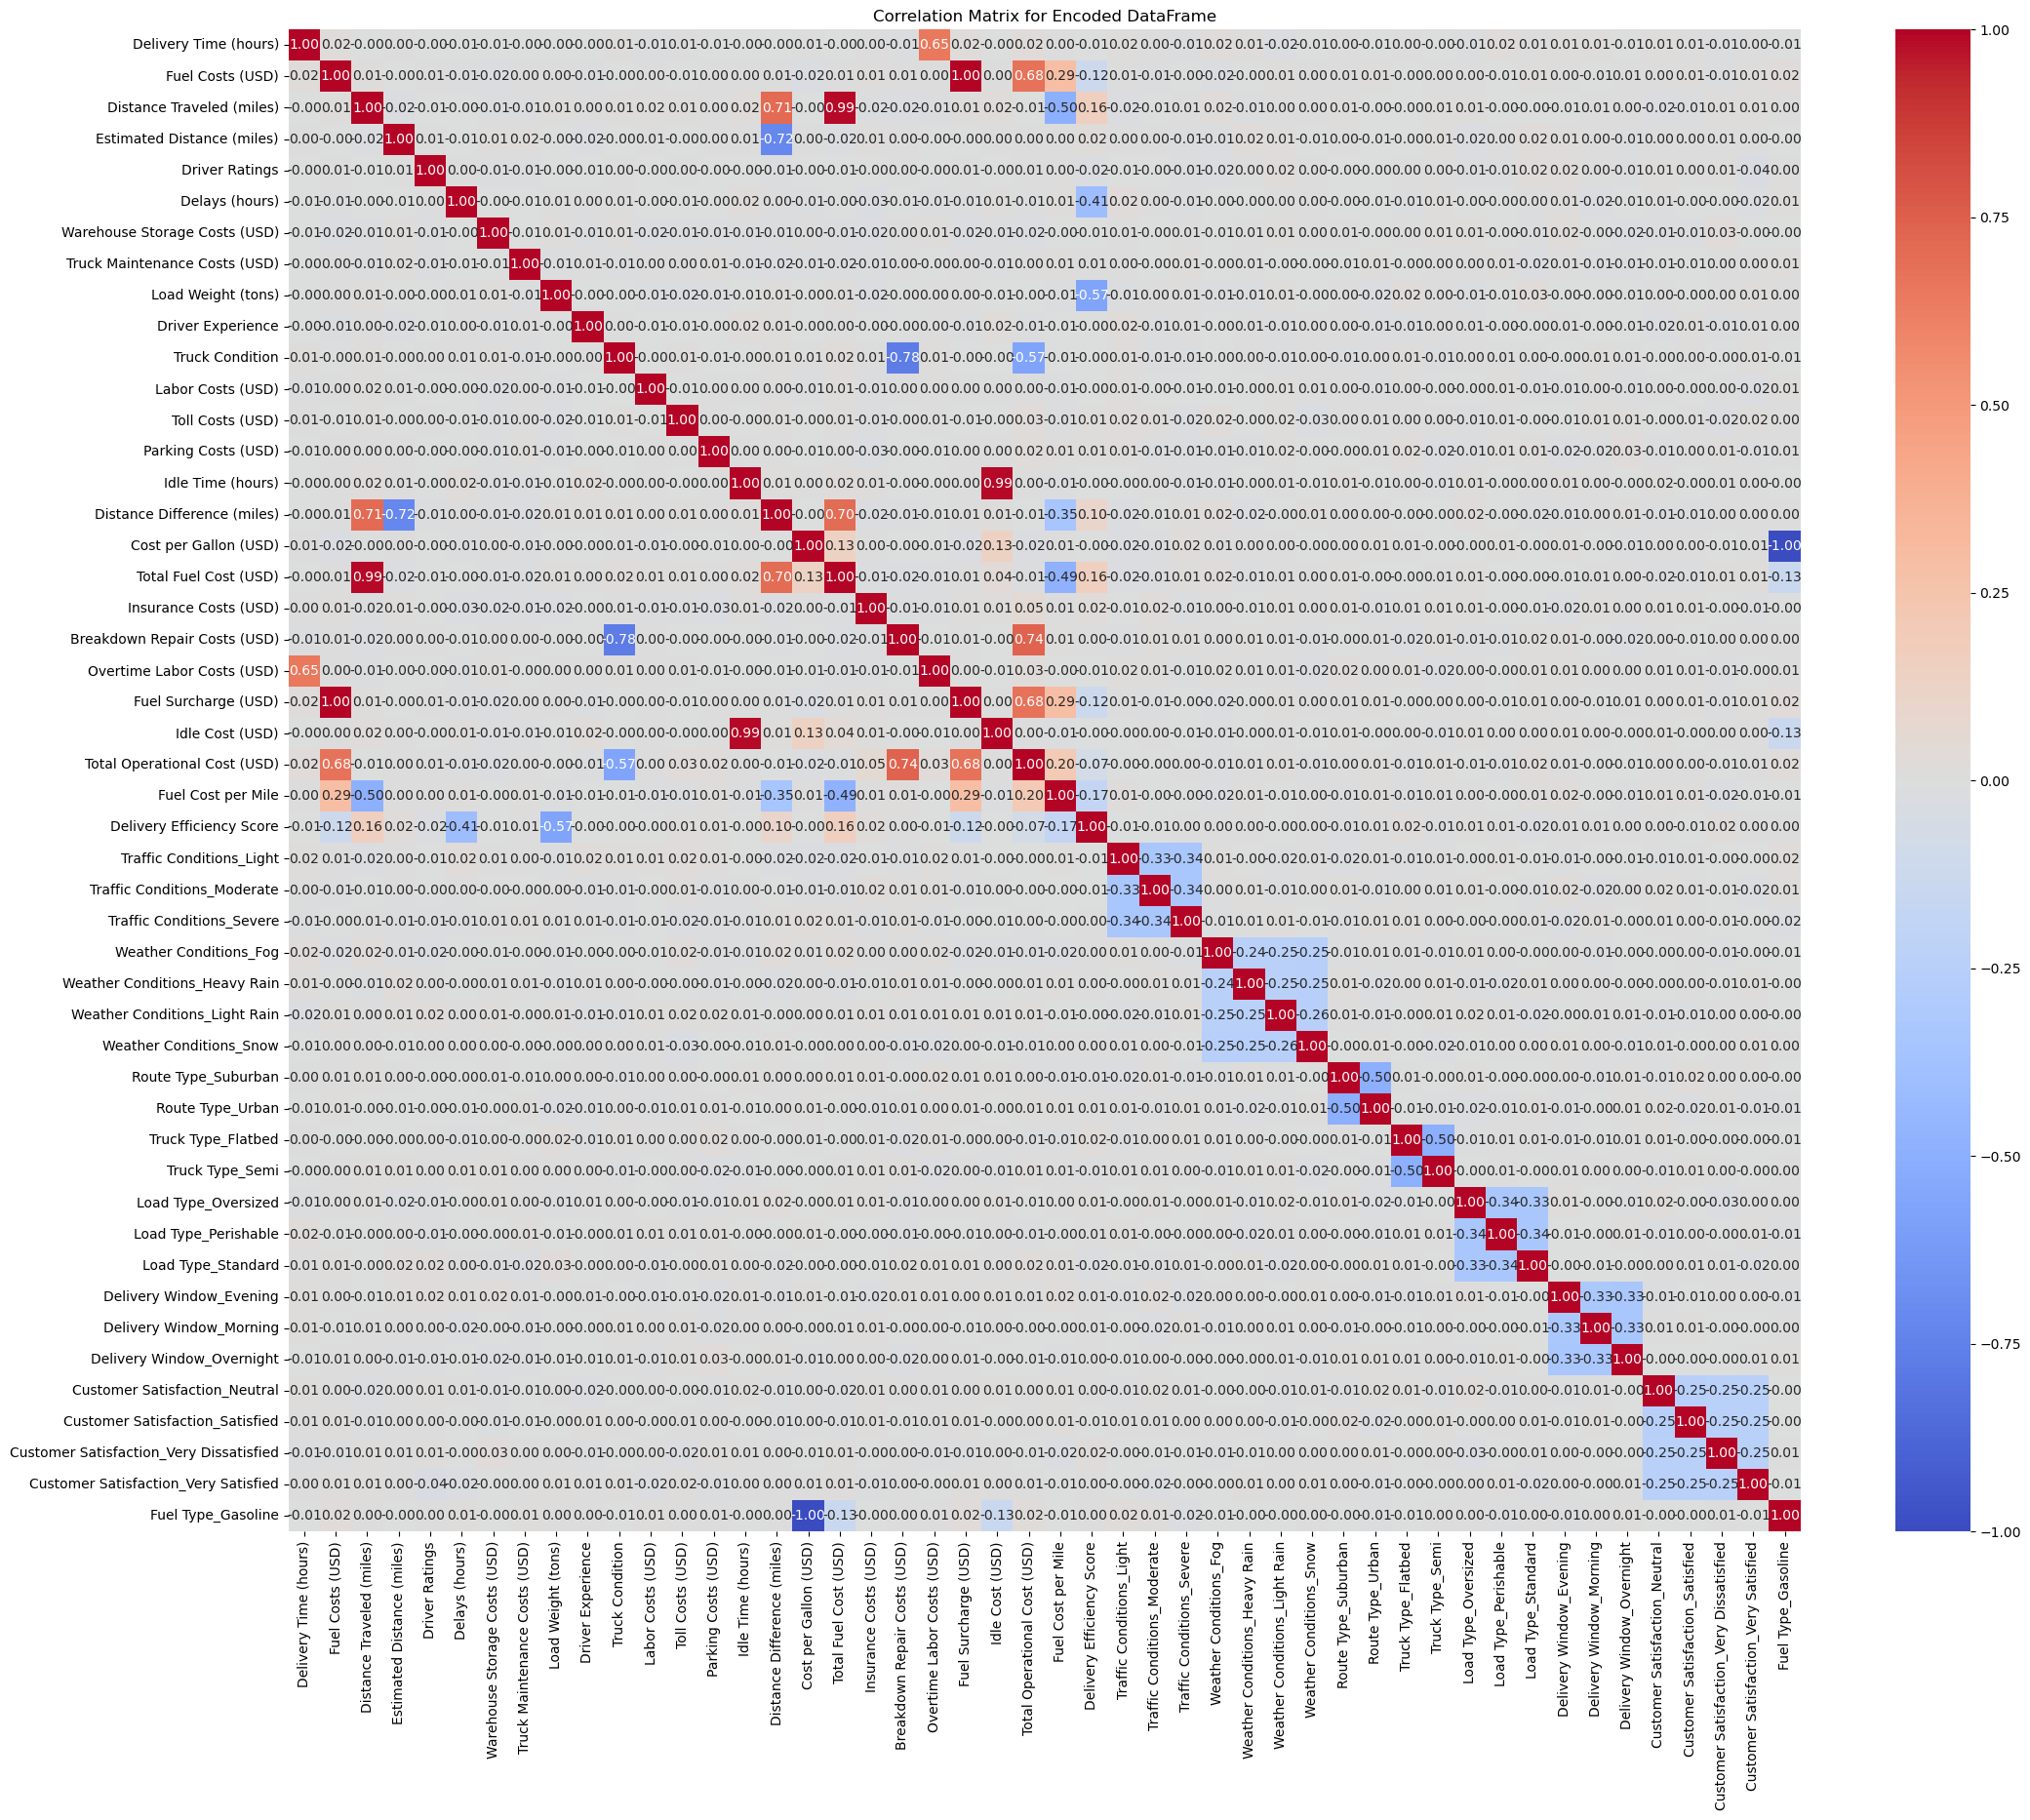

In [8]:
# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Encoded DataFrame")
plt.show()


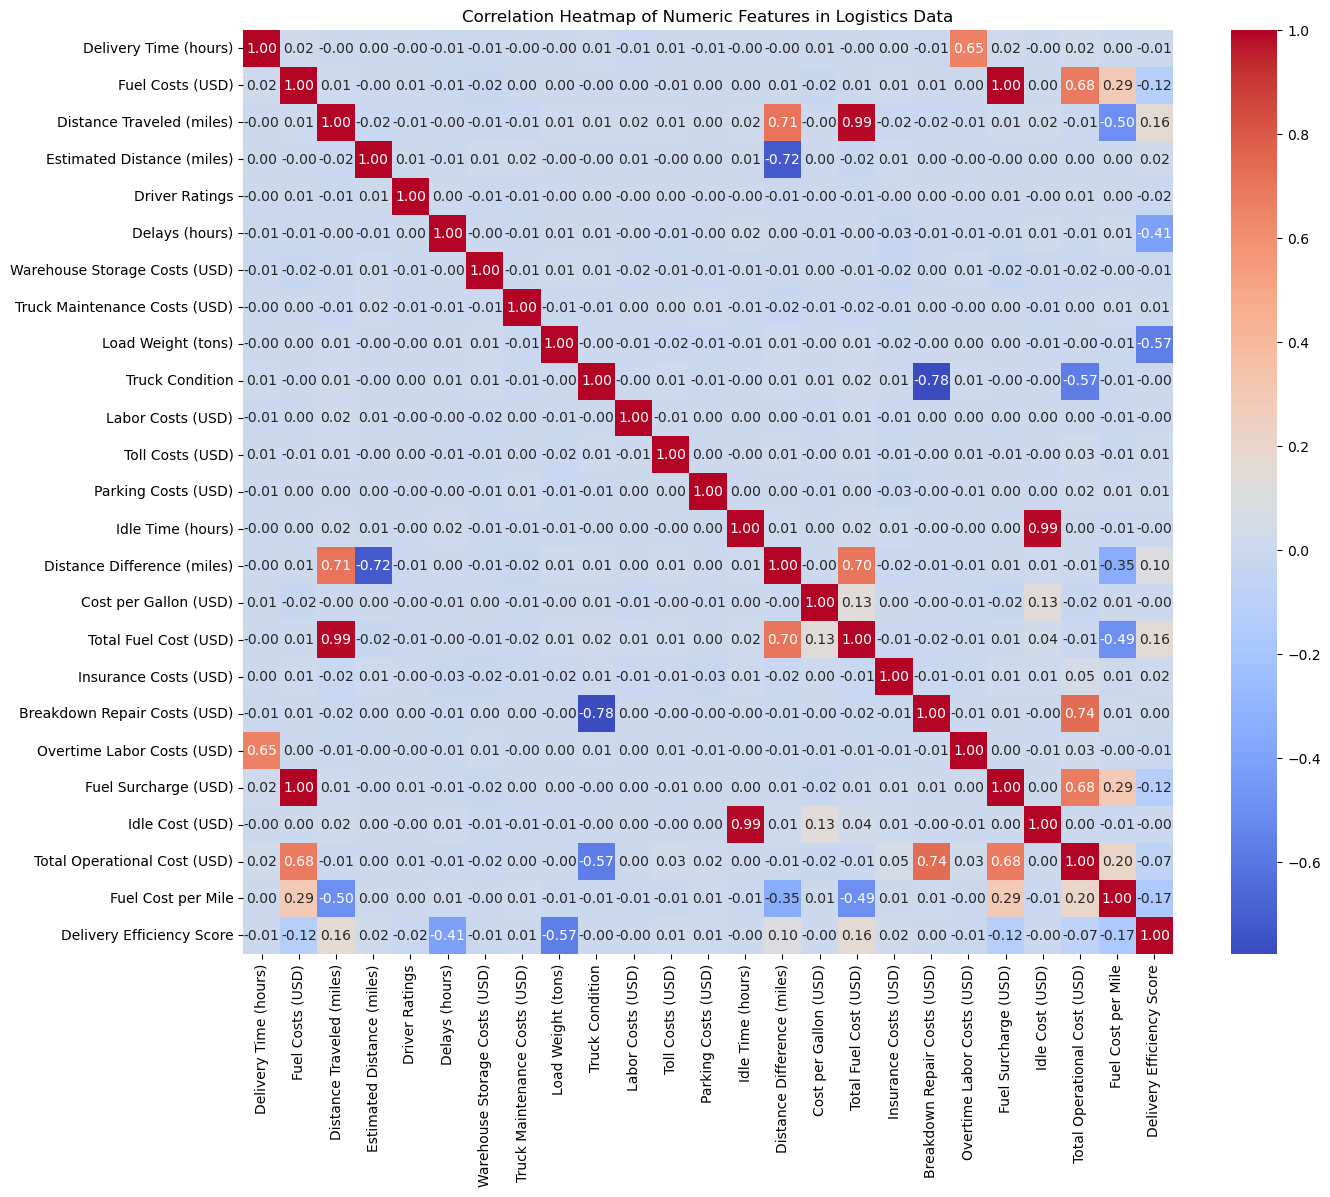

In [9]:
# Filter for numeric columns only
numeric_df = logistics_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features in Logistics Data")
plt.show()

EDA Part 2: Categorical Analysis and Visualizations

Count Plots for Categorical Variables:

For variables like Route Type, Truck Type, and Driver Experience, use count plots to see the distribution across categories.

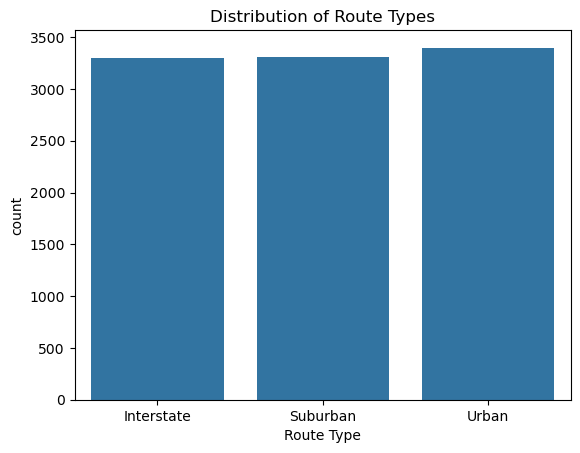

In [10]:
# Count plot for Route Type
sns.countplot(data=logistics_df, x='Route Type')
plt.title("Distribution of Route Types")
plt.show()

This line plot will show trends over time, helping identify any patterns in costs by traffic condition and allowing for better planning.

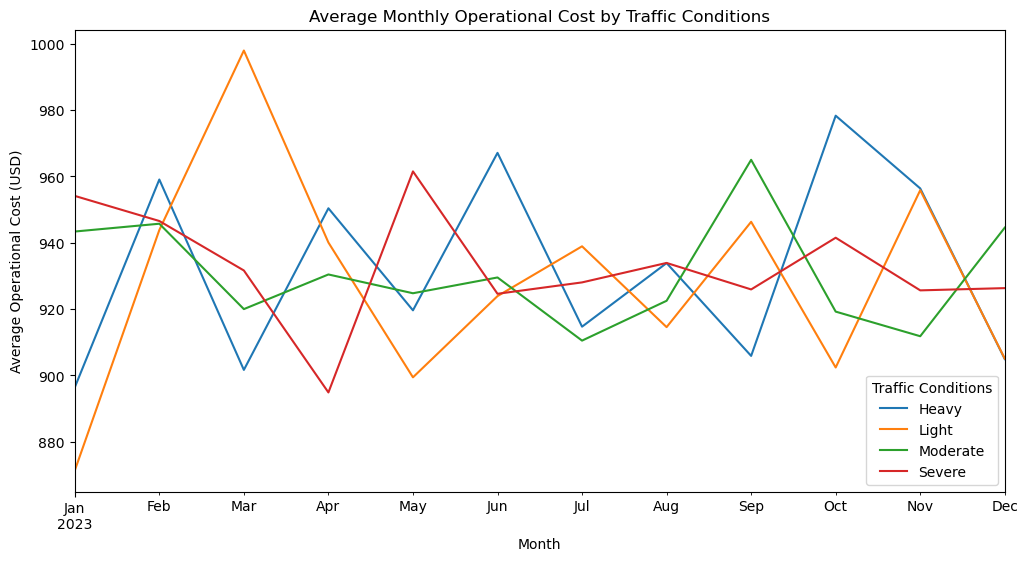

In [11]:
# Convert Date to datetime format if it isn't already
logistics_df['Date'] = pd.to_datetime(logistics_df['Date'])

# Aggregate by month and traffic conditions
monthly_data = logistics_df.groupby([logistics_df['Date'].dt.to_period("M"), 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot monthly average operational cost by traffic conditions
monthly_data.plot(kind='line', figsize=(12, 6))
plt.title("Average Monthly Operational Cost by Traffic Conditions")
plt.xlabel("Month")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

2. Seasonal Analysis by Traffic Conditions

To visualize seasonal variations, categorize data by season and plot operational costs.

This stacked bar chart allows for easy comparison of costs by season and traffic conditions, highlighting high-cost periods.

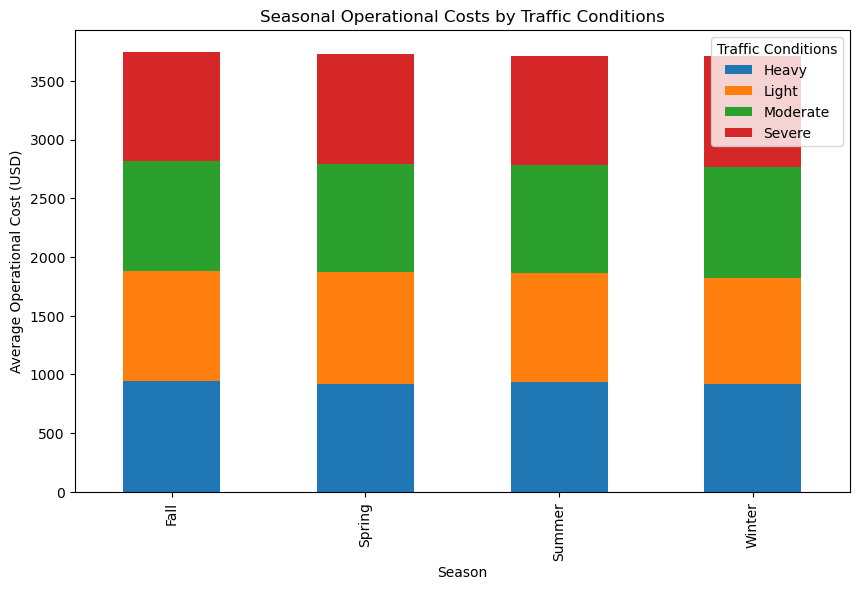

In [12]:
# Map months to seasons
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
logistics_df['Season'] = logistics_df['Date'].dt.month.map(season_map)

# Aggregate by season and traffic conditions
seasonal_data = logistics_df.groupby(['Season', 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot seasonal operational costs by traffic conditions
seasonal_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Seasonal Operational Costs by Traffic Conditions")
plt.xlabel("Season")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

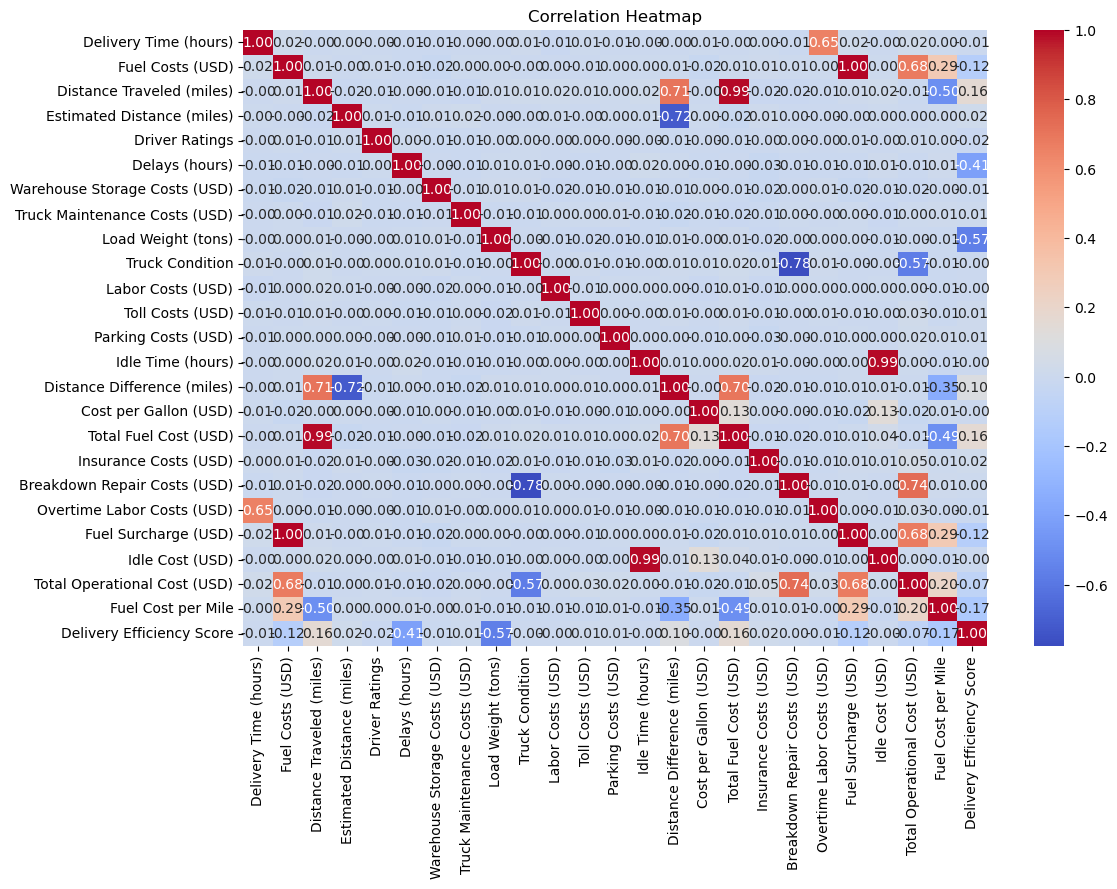

None


In [17]:

print(plot_numeric_correlation_heatmap(logistics_df))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(logistics_engineered_df[['Distance Traveled (miles)', 'Total Operational Cost (USD)', 'Delivery Efficiency Score']])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
logistics_engineered_df['Route Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.scatter(logistics_engineered_df['Distance Traveled (miles)'], logistics_engineered_df['Total Operational Cost (USD)'], 
            c=logistics_engineered_df['Route Cluster'], cmap='viridis')
plt.xlabel('Distance Traveled (miles)')
plt.ylabel('Total Operational Cost (USD)')
plt.title('Route Clustering by Cost and Distance')
plt.show()